In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.io
import os
from util import *

#plt.switch_backend('agg') # see: https://github.com/ioam/holoviews/issues/68

In [2]:
def get_global_index( domain, numCoeffs, voxel_i, voxel_j, coeff ):
    '''Returns the equation index for the given h coeffient at the given voxel.'''
    voxel = voxel_j*domain.res_x + voxel_i
    return voxel*numCoeffs + coeff
def visualize_solution( filename ):

    domain = Domain2D(7.0, 70)
    numVoxels = domain.res_x*domain.res_y

    # load solution from starmap solver for validation
    #mat_data = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/x_diffusion.mat")["x"]
    #mat_data = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/x_firstorder.mat")
    #mat_data = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/x_lspn.mat")
    mat_data = scipy.io.loadmat(filename)
    #mat_data = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/x_simplepn.mat")
    x = mat_data["x"]
    numCoeffs = mat_data["numCoeffs"]

    u0 = np.zeros( (domain.res_x, domain.res_y) )

    for voxel_i in range(domain.res_y):
        for voxel_j in range(domain.res_x):
            i = get_global_index(domain, numCoeffs, voxel_i, voxel_j, 0)
            value = x[i]
            #if abs(value) < 0.0:
            #    value = 0.00001
            u0[voxel_i, voxel_j] = value

    u0 = np.abs(u0)


    vmin = 1.0e-8
    vmax = np.max(u0)*1.0

    plt.imshow(u0.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')


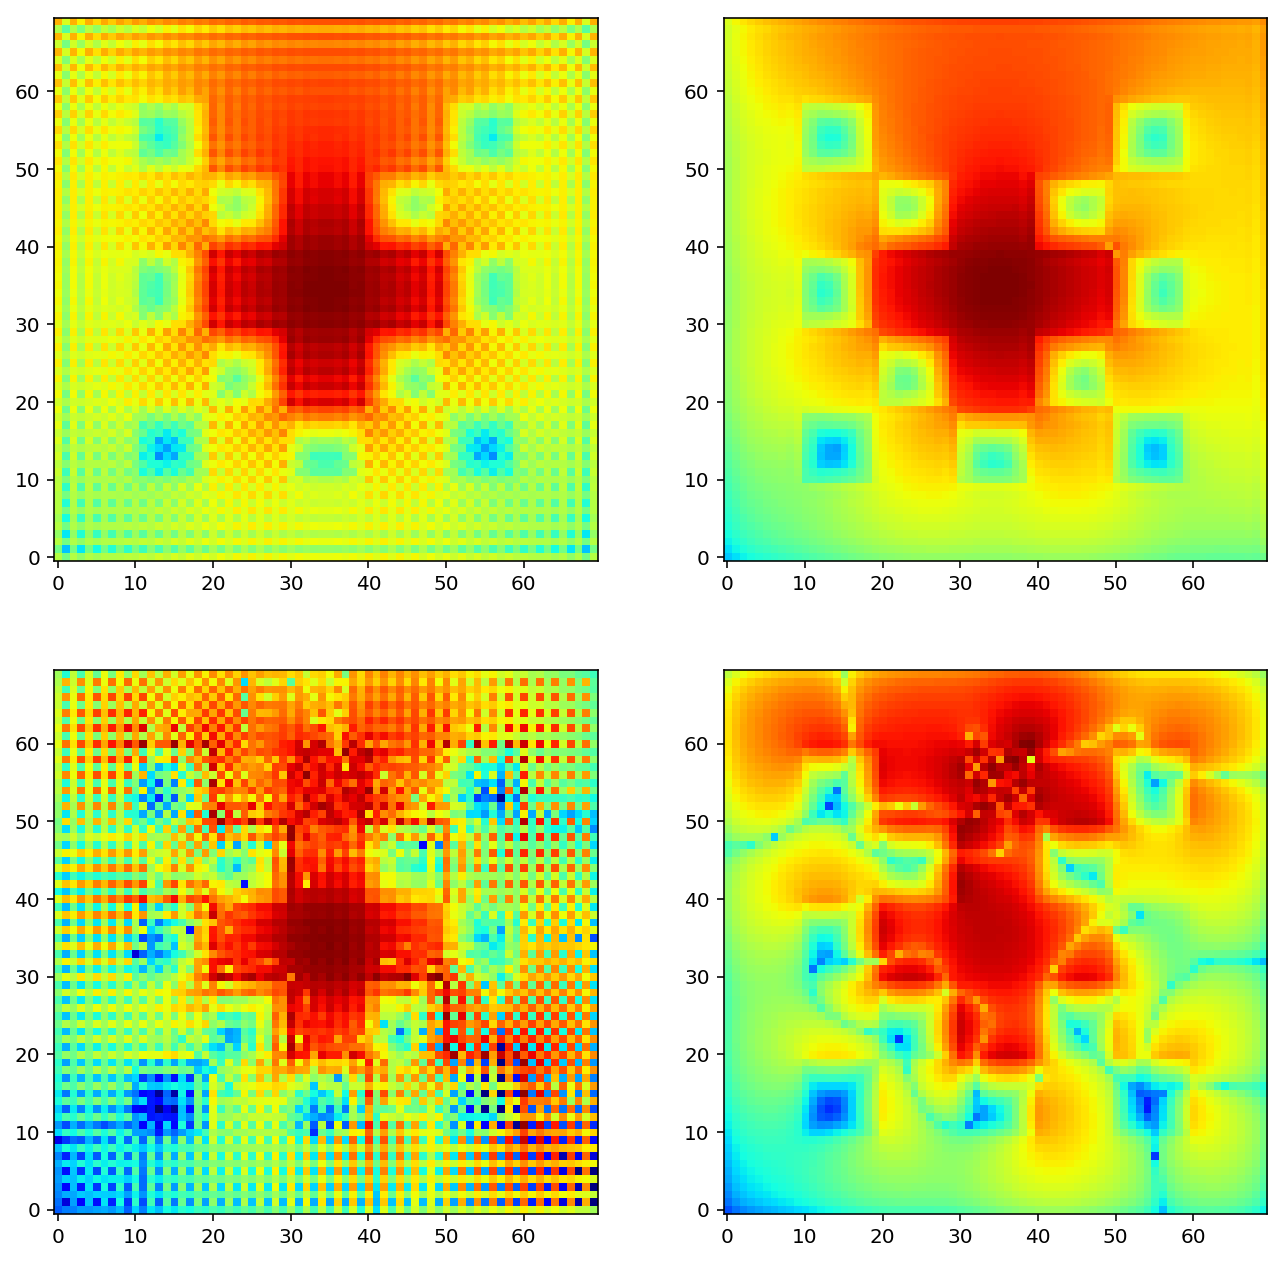

In [5]:

fig = plt.figure(figsize=(11, 11));
plt.subplot(221)
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_firstorder.mat")
plt.subplot(222)
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_firstorder_staggered.mat")
plt.subplot(223)
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn.mat")
plt.subplot(224)
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_staggered.mat")
plt.show();
#visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn.mat")


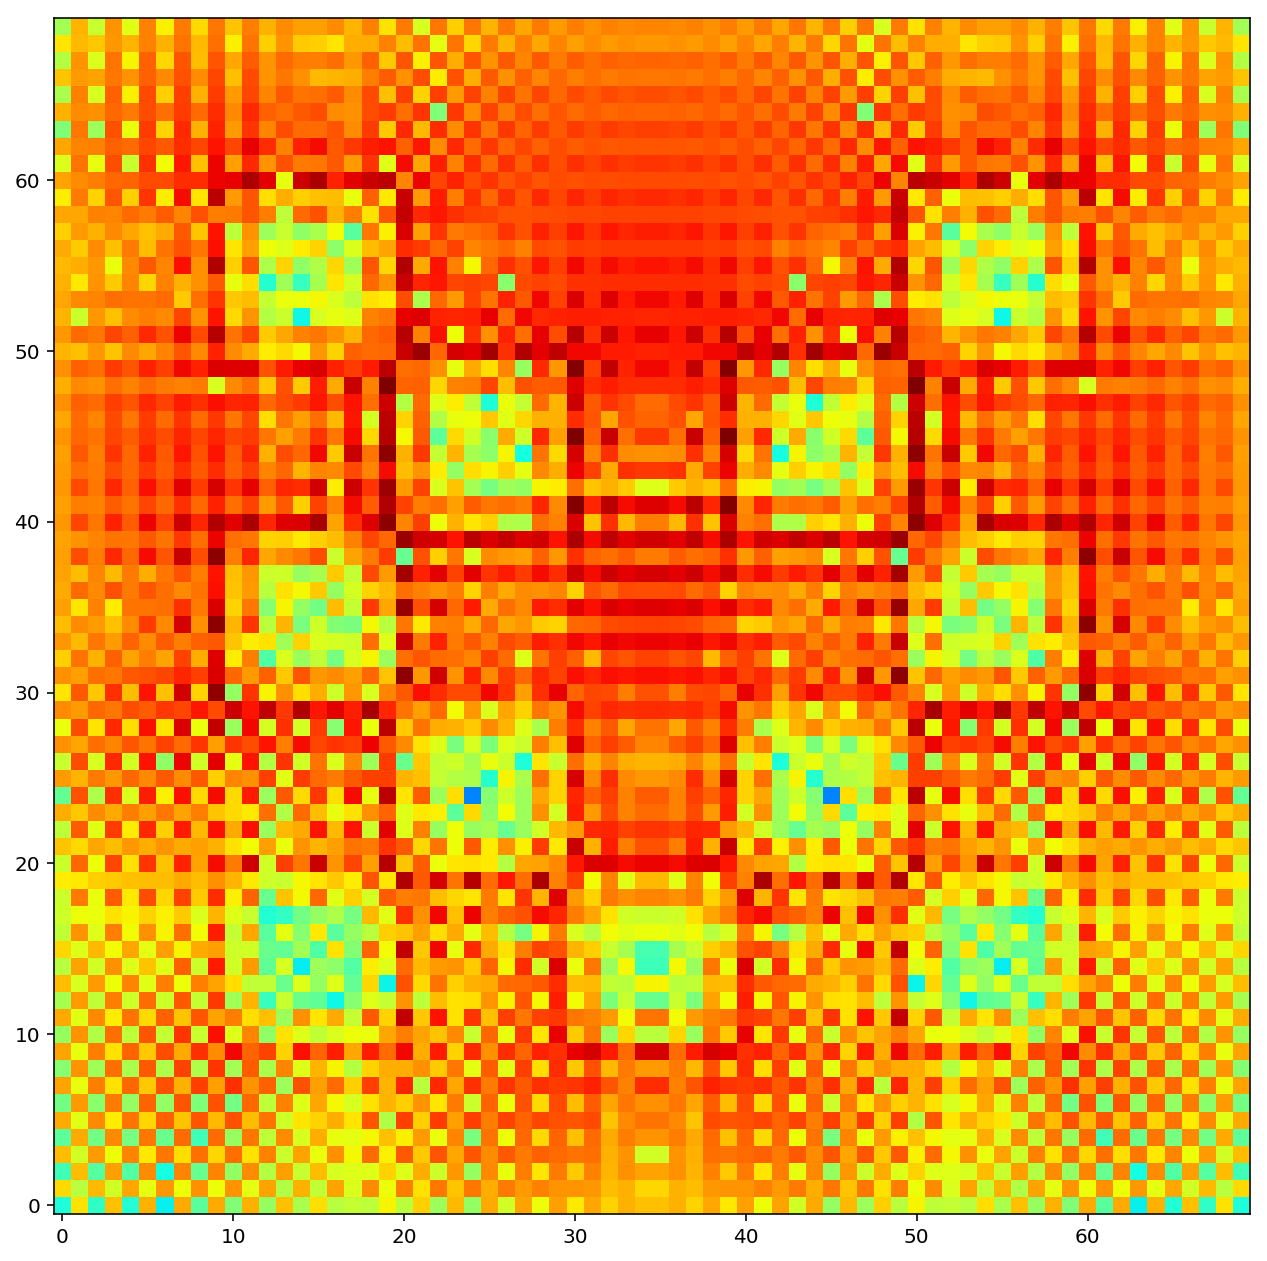

In [24]:
fig = plt.figure(figsize=(11, 11));
visualize_solution("C:/projects/epfl/epfl17/python/sopn/x_lspn_test.mat")
plt.show();

$$
c^{{l'-1,m'-1}}\frac{1}{2}\partial_x\sigma_t\left (\vec{x} \right )L^{{l'-1,m'-1}}\left (\vec{x} \right )-d^{{l'+1,m'-1}}\frac{1}{2}\partial_x\sigma_t\left (\vec{x} \right )L^{{l'+1,m'-1}}\left (\vec{x} \right )-e^{{l'-1,m'+1}}\frac{1}{2}\partial_x\sigma_t\left (\vec{x} \right )L^{{l'-1,m'+1}}\left (\vec{x} \right )+f^{{l'+1,m'+1}}\frac{1}{2}\partial_x\sigma_t\left (\vec{x} \right )L^{{l'+1,m'+1}}\left (\vec{x} \right )-c^{{l'-1,m'-1}}\frac{i}{2}\partial_y\sigma_t\left (\vec{x} \right )L^{{l'-1,m'-1}}\left (\vec{x} \right )+d^{{l'+1,m'-1}}\frac{i}{2}\partial_y\sigma_t\left (\vec{x} \right )L^{{l'+1,m'-1}}\left (\vec{x} \right )-e^{{l'-1,m'+1}}\frac{i}{2}\partial_y\sigma_t\left (\vec{x} \right )L^{{l'-1,m'+1}}\left (\vec{x} \right )+f^{{l'+1,m'+1}}\frac{i}{2}\partial_y\sigma_t\left (\vec{x} \right )L^{{l'+1,m'+1}}\left (\vec{x} \right )-a^{{l'-1,m'}}\partial_z\sigma_t\left (\vec{x} \right )L^{{l'-1,m'}}\left (\vec{x} \right )-b^{{l'+1,m'}}\partial_z\sigma_t\left (\vec{x} \right )L^{{l'+1,m'}}\left (\vec{x} \right )
$$

In [19]:
mat_data = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/data_lspn.mat")
mat_data_test = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/data_lspn_test.mat")


In [20]:

b = mat_data['b']
b_old = mat_data_test['b_old']

A = mat_data['A']
A_old = mat_data_test['A_old']

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if A[i, j] != A_old[i,j]:
            print("i={} j={} {} {}".format(i, j, A[i,j], A_old[i,j]))

i=6447 j=6448 0.0 -18.371173070873837
i=6447 j=6449 0.0 18.371173070873837
i=6448 j=6447 0.0 -18.371173070873837
i=6449 j=6447 0.0 18.371173070873837
i=6450 j=6451 0.0 -18.371173070873837
i=6450 j=6452 0.0 18.371173070873837
i=6451 j=6450 0.0 -18.371173070873837
i=6452 j=6450 0.0 18.371173070873837
i=6477 j=6478 0.0 18.371173070873837
i=6477 j=6479 0.0 -18.371173070873837
i=6478 j=6477 0.0 18.371173070873837
i=6479 j=6477 0.0 -18.371173070873837
i=6480 j=6481 0.0 18.371173070873837
i=6480 j=6482 0.0 -18.371173070873837
i=6481 j=6480 0.0 18.371173070873837
i=6482 j=6480 0.0 -18.371173070873837
i=6657 j=6658 0.0 -18.371173070873837
i=6657 j=6659 0.0 18.371173070873837
i=6658 j=6657 0.0 -18.371173070873837
i=6659 j=6657 0.0 18.371173070873837
i=6660 j=6661 0.0 -18.371173070873837
i=6660 j=6662 0.0 18.371173070873837
i=6661 j=6660 0.0 -18.371173070873837
i=6662 j=6660 0.0 18.371173070873837
i=6687 j=6688 0.0 18.371173070873837
i=6687 j=6689 0.0 -18.371173070873837
i=6688 j=6687 0.0 18.3711